# Doctor Type ML Models - Support Vector Machine
Amy Jin

6/29/2018, py27

### 5.2.5 Support Vector Machine

In step 40, we tried model Navie Bayes. It is a generative model to probabilistically determine labels for new points by having prior assumptions on the data. And here I will consider instead **discriminative classification**: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes! These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and SVM is a perfect solution to this problem.

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
data = pd.read_csv("/Users/yuejin/Documents/AmyJin_2018/Work/Test/2018_03/Doctor_Type_ML/final_table2.csv")
train, test = train_test_split(data, test_size=0.2, random_state = 100)
X_train = train.iloc[:,4:14]
y_train = train.iloc[:,1]
X_test = test.iloc[:,4:14]
y_test = test.iloc[:,1]

In [2]:
#model = SVC(kernel='linear', C=1E10)
#model.fit(X_train, y_train)
print y_test.shape

(37199,)


It takes more than 1 hour to run. Will run overnight!!!!!!!

#### SVM with PC1 & PC2

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

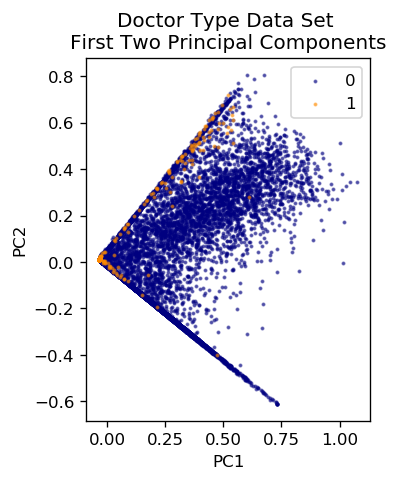

In [3]:
#X = X_train.iloc[:,4:14]
#y = y_train.iloc[:,1]
pca = PCA(n_components=2).fit_transform(X_train)
#X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y_train.values==0,0], pca[y_train.values==0,1], alpha=0.5, label='0', s=2, color='navy')
plt.scatter(pca[y_train.values==1,0], pca[y_train.values==1,1], alpha=0.5, label='1', s=2, color='darkorange')
plt.legend()
plt.title('Doctor Type Data Set \nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [4]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
print("Original shape:   ", X_train.shape)
print("Transformed shape:", X_pca.shape)
print pca.explained_variance_ratio_

('Original shape:   ', (148794, 10))
('Transformed shape:', (148794, 2))
[0.5711183  0.31674409]


The transformed data has been reduced to a 2 dimensions. PC1 has 57.11183% vairance explained and PC2 has 31.674409%. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data.

Apply the mapping (transform) to both the training set and the test set:

In [5]:
print X_train.shape[1], X_test.shape[1]
train_2d = pca.transform(X_train)
test_2d = pca.transform(X_test)

10 10


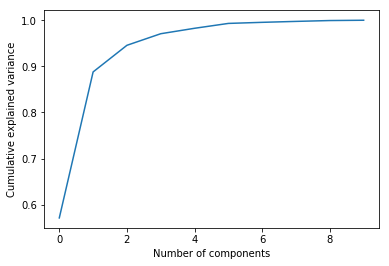

In [6]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

This curve quantifies how much of the total, 10-dimensional variance is contained within the first N components. For example, we see that with the digits the first 2 components contain approximately 95% of the variance, while you need around 8 components to describe close to 100% of the variance.

In [9]:
print train_2d
print test_2d

[[-0.03520157  0.00897886]
 [-0.03520157  0.00897886]
 [-0.03520157  0.00897886]
 ...
 [-0.03520157  0.00897886]
 [-0.03520157  0.00897886]
 [ 0.13110373 -0.12535664]]
[[-0.03520157  0.00897886]
 [ 0.0039445  -0.02315123]
 [-0.03520157  0.00897886]
 ...
 [-0.03520157  0.00897886]
 [-0.03520157  0.00897886]
 [-0.03520157  0.00897886]]


### 1) Radial Basis Function / Gaussian Kernel SVM
Def: https://en.wikipedia.org/wiki/Radial_basis_function_kernel

In [38]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


#### Tuning Hyperparameters
There are 2 important hyperparameters in an SVM model.

1) C Parameter

The C parameter decides the margin width of the SVM classifier. Large value of C makes the classifier strict and thus small margin width. For large values of C, the model will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the model to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

2) γ Parameter

The γ parameter defines the influence of each training example reaches. γ parameter is invalid for a linear kernel in scikit-learn.

We can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [51]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50, 100, 500],
              'svc__gamma': [0.000001, 0.00005, 0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(train_2d, y_train)
print(grid.best_params_)

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be 

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be 

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be 

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be 

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be 

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be 

CPU times: user 10min 13s, sys: 46.4 s, total: 11min
Wall time: 8min 2s
{'svc__gamma': 1e-06, 'svc__C': 1}


The optimal values should fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum. However, after a couple of trials, the optimal values are still at the edges. It's is a problem of the training data. We may try grid search later when we have good enough data. Now let's assume the best value set is: {'svc__gamma': 1e-06, 'svc__C': 1}

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [52]:
gaussian_SVM = grid.best_estimator_
y_pred = gaussian_SVM.predict(test_2d)

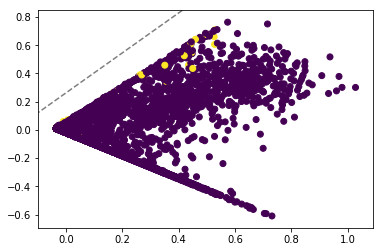

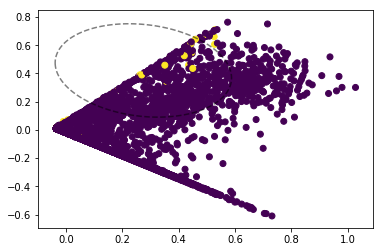

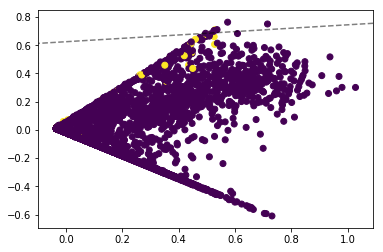

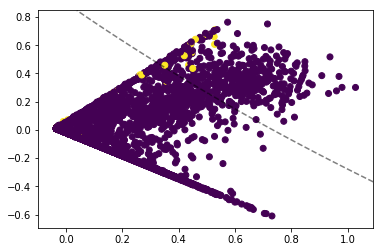

0.9969354014892874
0.9969354014892874
0.9969354014892874
0.9969354014892874


In [59]:
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(test_2d, y_test, 1, 1e-06))
clf_arr.append(draw_svm(test_2d, y_test, 10, 0.01))
clf_arr.append(draw_svm(test_2d, y_test, 1000, 1e-6))
clf_arr.append(draw_svm(test_2d, y_test, 100, 0.0001))

for i, clf in enumerate(clf_arr):
    print(clf.score(test_2d, y_test))

The above plots show decision boundaries of 4 pairs of gamma and C. Let's see how it works for the first pair.

Accuracy of Gaussian Kernel SVM classifier on test set: 0.9969354014892874
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37085
          1       0.00      0.00      0.00       114

avg / total       0.99      1.00      1.00     37199



/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


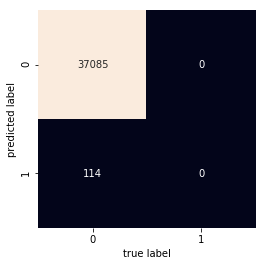

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of Gaussian Kernel SVM classifier on test set: {:.16f}'.format(gaussian_SVM.score(test_2d, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

### 2) Polynomial Kernel SVM
http://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='poly', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.grid_search import GridSearchCV
param_grid = {'svc__degree': [2, 3, 4, 5, 6, 7, 8]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(train_2d, y_train)
print(grid.best_params_)

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 

Assume degree 8 is the best model.

In [8]:
#gaussian_SVM = grid.best_estimator_
gaussian_SVM = SVC(kernel='poly', class_weight='balanced', degree = 8)
gaussian_SVM.fit(train_2d, y_train)
y_pred = gaussian_SVM.predict(test_2d)

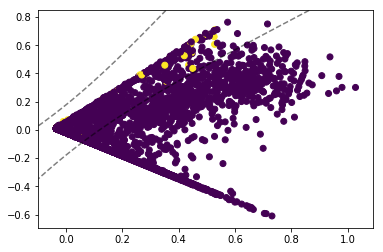

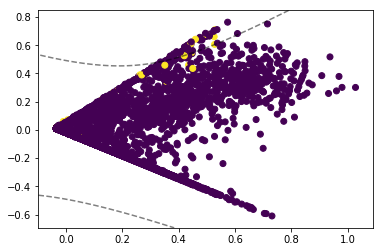

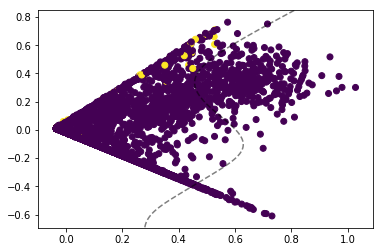

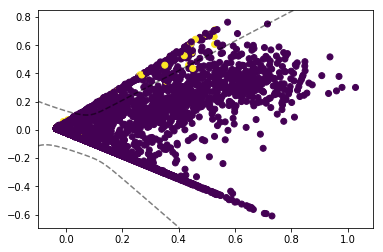

In [9]:
def draw_svm(X, y, degree = 8):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='poly', degree = degree)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

clf = draw_svm(test_2d, y_test, degree = 2)
clf = draw_svm(test_2d, y_test, degree = 4)
clf = draw_svm(test_2d, y_test, degree = 6)
clf = draw_svm(test_2d, y_test, degree = 8)

[[    0 37085]
 [    0   114]]
Accuracy of Poly Kernel SVM classifier on test set: 0.0030645985107127
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     37085
          1       0.00      1.00      0.01       114

avg / total       0.00      0.00      0.00     37199



/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


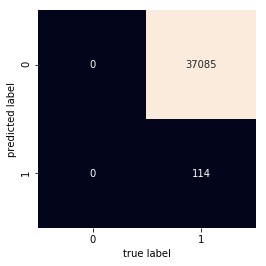

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of Poly Kernel SVM classifier on test set: {:.16f}'.format(gaussian_SVM.score(test_2d, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

### 3) Linear Kernel SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(train_2d, y_train)
print(grid.best_params_)

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be 

In [12]:
#linear_SVM = grid.best_estimator_
linear_SVM = SVC(kernel='linear', class_weight='balanced', C = 1)
linear_SVM.fit(train_2d, y_train)
y_pred = linear_SVM.predict(test_2d)

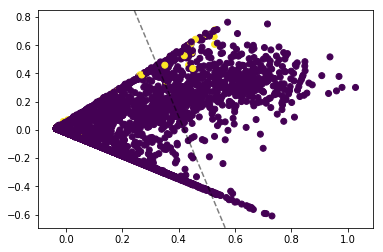

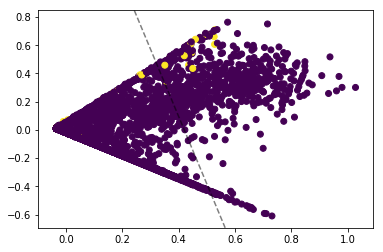

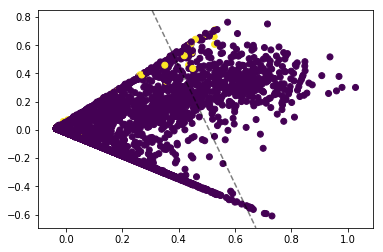

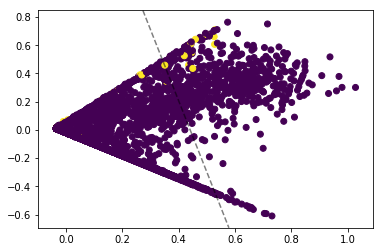

0.9969354014892874
0.9969354014892874
0.9969354014892874
0.9969354014892874


In [13]:
# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C=1.0):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf = SVC(kernel='linear', C=C)
    clf_fit = clf.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    # Returns the classifier
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(test_2d, y_test, 0.0001))
clf_arr.append(draw_svm(test_2d, y_test, 0.001))
clf_arr.append(draw_svm(test_2d, y_test, 1))
clf_arr.append(draw_svm(test_2d, y_test, 10))

for i, clf in enumerate(clf_arr):
    # Accuracy Score
    print(clf.score(test_2d, y_test))


[[36115   970]
 [   92    22]]
Accuracy of Linear SVM classifier on test set: 0.9714508454528348
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     37085
          1       0.02      0.19      0.04       114

avg / total       0.99      0.97      0.98     37199



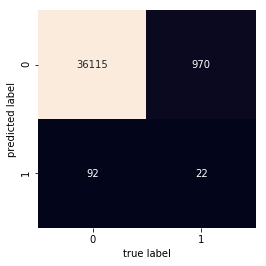

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of Linear SVM classifier on test set: {:.16f}'.format(linear_SVM.score(test_2d, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

### 4) Sigmoid Kernel SVM

In [ ]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='sigmoid')
sigmoid_SVM.fit(train_2d, y_train)
y_pred = sigmoid_SVM.predict(test_2d)

In [16]:
sigmoid_SVM = SVC(kernel='sigmoid')
sigmoid_SVM.fit(train_2d, y_train)
y_pred = linear_SVM.predict(test_2d)

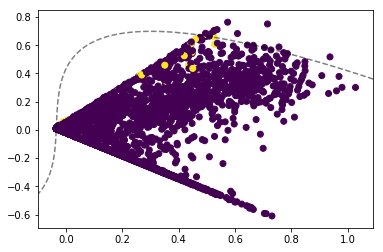

0.9969354014892874


In [17]:
# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf = SVC(kernel='sigmoid')
    clf_fit = clf.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    # Returns the classifier
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(test_2d, y_test))

for i, clf in enumerate(clf_arr):
    # Accuracy Score
    print(clf.score(test_2d, y_test))


[[36115   970]
 [   92    22]]
Accuracy of Linear SVM classifier on test set: 0.9969354014892874
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     37085
          1       0.02      0.19      0.04       114

avg / total       0.99      0.97      0.98     37199



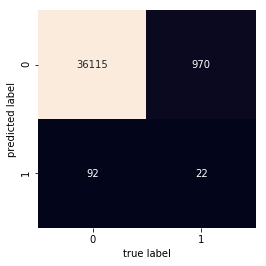

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of Linear SVM classifier on test set: {:.16f}'.format(sigmoid_SVM.score(test_2d, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

#### Pros and Cons associated with SVM
Pros:
* It works really well with clear margin of separation
* It is effective in high dimensional spaces.
* It is effective in cases where number of dimensions is greater than the number of samples.
* It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Cons:
* It doesn’t perform well, when we have large data set because the required training time is higher
* It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
* SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
https://mubaris.com/2017/10/14/svm-python/
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html